In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | outjo
Processing Record 5 of Set 1 | san rafael
Processing Record 6 of Set 1 | urumqi
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | lakes entrance
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | payo
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | yauya
Processing Record 17 of Set 1 | vostok
Processing Record 18 of Set 1 | cayenne
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | vilanova del cami
Processing Record 21 of Set 1 | katherine
Processing Record

Processing Record 39 of Set 4 | krasnoshchekovo
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | nyurba
Processing Record 42 of Set 4 | pilao arcado
City not found. Skipping...
Processing Record 43 of Set 4 | tazovskiy
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | moron
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | dorfen
Processing Record 49 of Set 4 | sinnamary
Processing Record 50 of Set 4 | xining
Processing Record 1 of Set 5 | fukue
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | agua verde
Processing Record 5 of Set 5 | buala
Processing Record 6 of Set 5 | raga
Processing Record 7 of Set 5 | ballina
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | karaul
City not found. Skipping...
Processing Record 10 of Set 5 | mantua
Processing Record 11 of Set 5

Processing Record 27 of Set 8 | morehead
Processing Record 28 of Set 8 | oxapampa
Processing Record 29 of Set 8 | abaete
Processing Record 30 of Set 8 | tucuman
Processing Record 31 of Set 8 | haines junction
Processing Record 32 of Set 8 | ivybridge
Processing Record 33 of Set 8 | djenne
Processing Record 34 of Set 8 | esqueda
Processing Record 35 of Set 8 | shenkursk
Processing Record 36 of Set 8 | buqayq
City not found. Skipping...
Processing Record 37 of Set 8 | murino
Processing Record 38 of Set 8 | johnson city
Processing Record 39 of Set 8 | rawson
Processing Record 40 of Set 8 | roald
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | encheng
Processing Record 43 of Set 8 | otradnoye
Processing Record 44 of Set 8 | bolpur
Processing Record 45 of Set 8 | san cristobal
Processing Record 46 of Set 8 | tyrma
Processing Record 47 of Set 8 | kurchum
Processing Record 48 of Set 8 | andenes
Processing Record 49 of Set 8 | azimur
City not found. Skipping...
Processi

Processing Record 16 of Set 12 | seydi
Processing Record 17 of Set 12 | broken hill
Processing Record 18 of Set 12 | lasa
Processing Record 19 of Set 12 | shimoda
Processing Record 20 of Set 12 | buraydah
Processing Record 21 of Set 12 | puerto leguizamo
Processing Record 22 of Set 12 | oistins
Processing Record 23 of Set 12 | aguas belas
Processing Record 24 of Set 12 | kashan
Processing Record 25 of Set 12 | quatre cocos
Processing Record 26 of Set 12 | bela
Processing Record 27 of Set 12 | lerwick
Processing Record 28 of Set 12 | kipini
Processing Record 29 of Set 12 | durban
Processing Record 30 of Set 12 | falealupo
City not found. Skipping...
Processing Record 31 of Set 12 | mvuma
Processing Record 32 of Set 12 | san jose
Processing Record 33 of Set 12 | clovis
Processing Record 34 of Set 12 | tessalit
Processing Record 35 of Set 12 | nangomba
Processing Record 36 of Set 12 | killybegs
Processing Record 37 of Set 12 | san pedro de uraba
Processing Record 38 of Set 12 | galle
Proc

In [9]:
len(city_data)

566

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,15.13,58,11,6.35,GL,2021-10-26 01:40:56
1,Bethel,41.3712,-73.4140,66.99,92,90,1.99,US,2021-10-26 01:38:26
2,Esperance,-33.8667,121.9000,55.24,64,70,6.49,AU,2021-10-26 01:40:57
3,Outjo,-20.1167,16.1500,59.79,42,37,4.74,NA,2021-10-26 01:40:57
4,San Rafael,-34.6177,-68.3301,74.12,15,1,5.53,AR,2021-10-26 01:40:59
5,Urumqi,43.8010,87.6005,34.75,60,0,4.47,CN,2021-10-26 01:40:59
6,Lakes Entrance,-37.8811,147.9810,61.16,65,26,7.81,AU,2021-10-26 01:41:01
7,Punta Arenas,-53.1500,-70.9167,35.71,80,75,3.44,CL,2021-10-26 01:41:02
8,Rikitea,-23.1203,-134.9692,75.69,72,62,17.60,PF,2021-10-26 01:41:02
9,Busselton,-33.6500,115.3333,54.05,64,98,3.38,AU,2021-10-26 01:41:03


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-10-26 01:40:56,72.7868,-56.1549,15.13,58,11,6.35
1,Bethel,US,2021-10-26 01:38:26,41.3712,-73.4140,66.99,92,90,1.99
2,Esperance,AU,2021-10-26 01:40:57,-33.8667,121.9000,55.24,64,70,6.49
3,Outjo,NA,2021-10-26 01:40:57,-20.1167,16.1500,59.79,42,37,4.74
4,San Rafael,AR,2021-10-26 01:40:59,-34.6177,-68.3301,74.12,15,1,5.53
...,...,...,...,...,...,...,...,...,...
561,Seoul,KR,2021-10-26 01:42:54,37.5683,126.9778,58.44,69,20,3.44
562,Merke,KZ,2021-10-26 01:45:47,42.8728,73.1786,50.68,31,14,5.10
563,Carutapera,BR,2021-10-26 01:45:48,-1.1950,-46.0200,79.68,78,7,7.70
564,Kathmandu,NP,2021-10-26 01:45:48,27.7167,85.3167,61.02,94,75,3.44


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

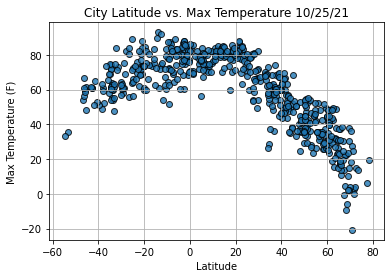

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

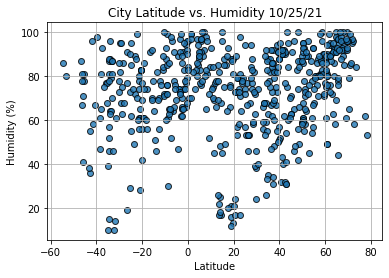

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

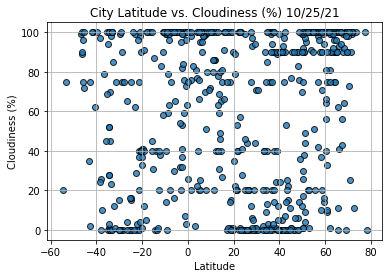

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

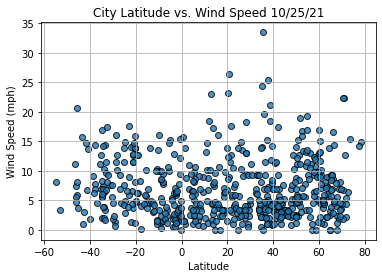

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City               Saint-Philippe
Country                        RE
Date          2021-10-26 01:41:04
Lat                      -21.3585
Lng                       55.7679
Max Temp                    72.95
Humidity                       80
Cloudiness                     40
Wind Speed                  14.25
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
561     True
562     True
563    False
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-10-26 01:40:56,72.7868,-56.1549,15.13,58,11,6.35
1,Bethel,US,2021-10-26 01:38:26,41.3712,-73.4140,66.99,92,90,1.99
5,Urumqi,CN,2021-10-26 01:40:59,43.8010,87.6005,34.75,60,0,4.47
12,Kodiak,US,2021-10-26 01:39:01,57.7900,-152.4072,42.31,81,90,9.22
15,Vostok,RU,2021-10-26 01:41:05,46.4856,135.8833,50.68,46,0,3.40


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

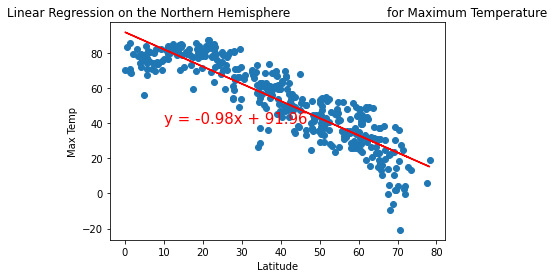

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

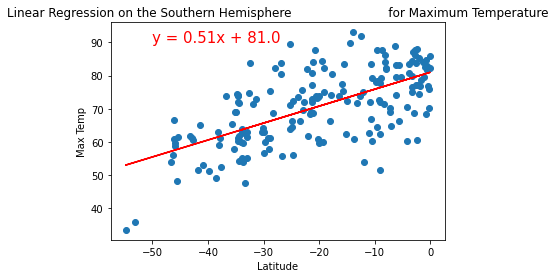

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

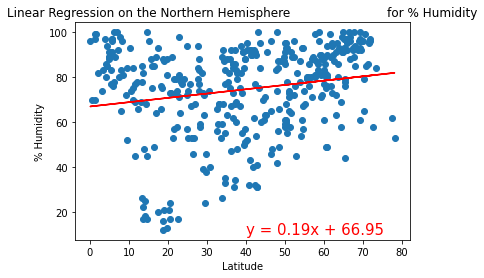

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

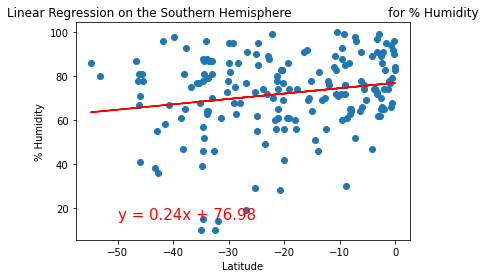

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

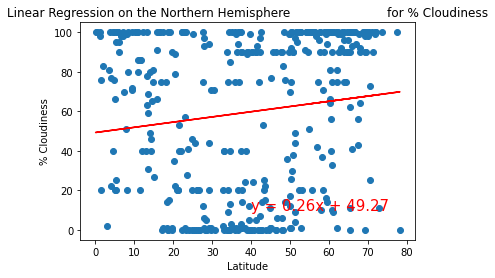

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

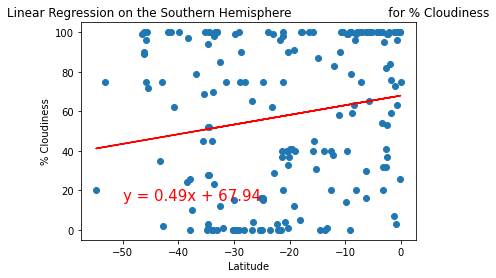

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

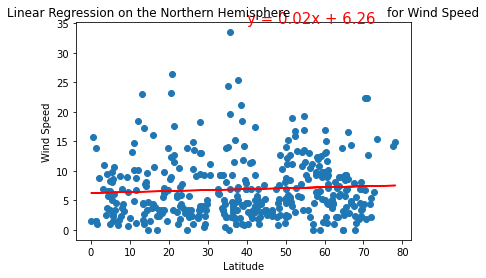

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

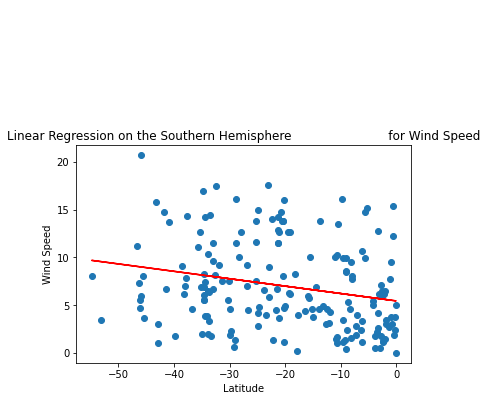

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))